In [5]:
import numpy as np
import pandas as pd

In [7]:
from google.colab import files
files_u = files.upload()

Saving salary.csv to salary (1).csv


In [8]:
data = pd.read_csv('salary.csv')

In [9]:
print(data.head())
print(data.describe())

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
                age  education.num  capital.gain  hours.per.week
count  32561.000000   32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844       40.437456
std       13.640433       2.572720   7385.292085       12.347429
min       17.000000       1.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000       99.000000


In [11]:
income_set = set(data['income'])
data['income'] = data['income'].map({'<=50K' : 0, '>50K' : 1}).astype(int)
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [15]:
X = data.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [16]:
Y = data.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

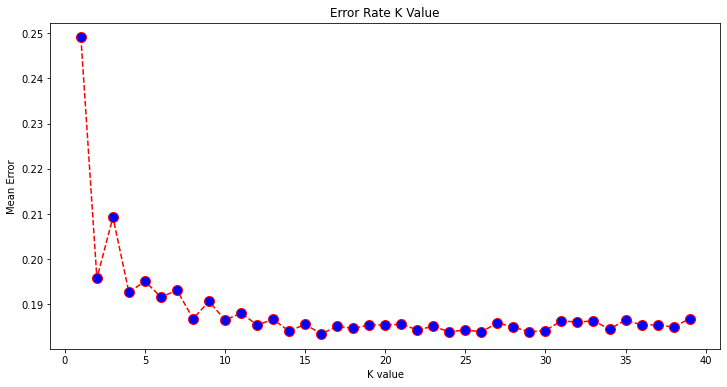

In [20]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(x_train,y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [24]:
age = int(input('Age: '))
edu = int(input('Education: '))
cg = int(input('capital gain: '))
wh = int(input('hours per week:'))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might get above 50k salary")
else:
  print("Employee might not get above 50k salary")

Age: 41
Education: 10
capital gain: 0
hours per week:40
[0]
Employee might not get above 50k salary


In [25]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix: ')
print(cm)

print('Accuracy of the model {0}'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[4709  257]
 [ 938  609]]
Accuracy of the model 81.65208045447567
